In [1]:
import tensorflow as tf
TF_ENABLE_ONEDNN_OPTS=0
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

2024-12-06 06:39:13.523729: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 06:39:13.540113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733467153.560147    1075 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733467153.566196    1075 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 06:39:13.586380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
tf.__version__

'2.18.0'

In [3]:
%matplotlib inline

In [4]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


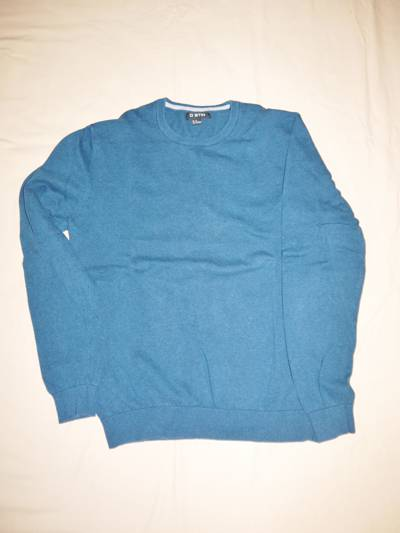

In [5]:
path = './clothing-dataset-small/train/longsleeve/0142c777-baf8-4500-add9-6641b95b90ec.jpg'
load_img(path)

In [6]:
img = load_img(path, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights = 'imagenet', input_shape=(299,299,3))

I0000 00:00:1733467163.025788    1075 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [10]:
x

array([[[198, 172, 147],
        [198, 172, 147],
        [199, 173, 148],
        ...,
        [210, 186, 160],
        [209, 185, 159],
        [207, 183, 157]],

       [[202, 176, 151],
        [202, 176, 151],
        [203, 177, 152],
        ...,
        [211, 187, 161],
        [211, 187, 161],
        [211, 187, 161]],

       [[201, 175, 150],
        [202, 176, 151],
        [202, 176, 151],
        ...,
        [212, 188, 162],
        [212, 188, 162],
        [213, 189, 163]],

       ...,

       [[217, 195, 174],
        [218, 196, 175],
        [218, 197, 176],
        ...,
        [230, 213, 187],
        [231, 214, 188],
        [231, 214, 188]],

       [[214, 192, 171],
        [215, 193, 172],
        [216, 194, 173],
        ...,
        [230, 213, 187],
        [230, 213, 187],
        [231, 214, 188]],

       [[212, 190, 169],
        [213, 191, 170],
        [214, 192, 171],
        ...,
        [229, 212, 186],
        [229, 212, 186],
        [230, 213, 187]]

In [11]:
X = np.array([x,x,x])

In [12]:
X.shape

(3, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

I0000 00:00:1733467166.329664    1133 service.cc:148] XLA service 0x7f30b00017d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733467166.329694    1133 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-06 06:39:26.365760: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733467166.678738    1133 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-06 06:39:27.623319: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.76GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-06 06:39:28.091139: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 whi

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733467168.821119    1133 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [15]:
pred

array([[5.1029103e-05, 1.9495588e-05, 4.7436512e-05, ..., 3.3024597e-05,
        2.8925382e-05, 6.5196917e-05],
       [5.1029103e-05, 1.9495588e-05, 4.7436512e-05, ..., 3.3024597e-05,
        2.8925382e-05, 6.5196917e-05],
       [5.1029103e-05, 1.9495588e-05, 4.7436512e-05, ..., 3.3024597e-05,
        2.8925382e-05, 6.5196917e-05]], dtype=float32)

In [16]:
decode_predictions(pred)

[[('n04370456', 'sweatshirt', np.float32(0.5552665)),
  ('n03595614', 'jersey', np.float32(0.26560873)),
  ('n04599235', 'wool', np.float32(0.058729157)),
  ('n04525038', 'velvet', np.float32(0.006041408)),
  ('n02963159', 'cardigan', np.float32(0.0057979017))],
 [('n04370456', 'sweatshirt', np.float32(0.5552665)),
  ('n03595614', 'jersey', np.float32(0.26560873)),
  ('n04599235', 'wool', np.float32(0.058729157)),
  ('n04525038', 'velvet', np.float32(0.006041408)),
  ('n02963159', 'cardigan', np.float32(0.0057979017))],
 [('n04370456', 'sweatshirt', np.float32(0.5552665)),
  ('n03595614', 'jersey', np.float32(0.26560873)),
  ('n04599235', 'wool', np.float32(0.058729157)),
  ('n04525038', 'velvet', np.float32(0.006041408)),
  ('n02963159', 'cardigan', np.float32(0.0057979017))]]

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train/', 
    target_size=(150, 150),  
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [20]:
next(train_ds)

(array([[[[ 0.92156863,  0.41176474, -0.09019607],
          [ 0.9372549 ,  0.427451  , -0.0745098 ],
          [ 0.94509804,  0.43529415, -0.06666666],
          ...,
          [ 0.99215686,  0.8980392 ,  0.52156866],
          [ 0.99215686,  0.8901961 ,  0.5372549 ],
          [ 0.9843137 ,  0.8666667 ,  0.56078434]],
 
         [[ 0.9372549 ,  0.43529415, -0.05098039],
          [ 0.9764706 ,  0.47450984, -0.01176471],
          [ 0.9607843 ,  0.45882356, -0.02745098],
          ...,
          [ 0.9607843 ,  0.8980392 ,  0.5294118 ],
          [ 0.9764706 ,  0.8901961 ,  0.5372549 ],
          [ 1.        ,  0.8901961 ,  0.58431375]],
 
         [[ 0.8980392 ,  0.39607847, -0.09019607],
          [ 0.9529412 ,  0.45098042, -0.03529412],
          [ 0.9843137 ,  0.48235297, -0.00392157],
          ...,
          [ 0.9764706 ,  0.92156863,  0.56078434],
          [ 0.9843137 ,  0.92156863,  0.56078434],
          [ 0.99215686,  0.92156863,  0.6       ]],
 
         ...,
 
         [[ 

In [21]:
X, y = next(train_ds)

In [22]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [23]:
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [24]:
base_model = Xception(
    weights ='imagenet', 
    include_top=False, 
    input_shape=(150,150,3))

base_model.trainable = False

In [25]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [26]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [27]:
preds

array([[ 9.12021637e-01, -8.29089642e-01, -1.23014259e+00,
        -3.33802700e-02, -3.35453957e-01, -6.28512383e-01,
        -5.51213399e-02, -5.38046718e-01,  3.58106613e-01,
         2.30949372e-02],
       [ 7.71518946e-01,  7.59994745e-01, -1.81358323e-01,
         2.65949607e-01,  1.71436965e-01, -1.11632431e+00,
        -9.99194905e-02, -1.06102991e+00,  7.78627336e-01,
        -9.72774982e-01],
       [-1.99621677e-01,  1.40167475e-01, -1.69967175e-01,
        -3.62952352e-01,  7.22817183e-01, -1.72333944e+00,
         2.06678122e-01,  1.55664682e+00,  6.95437491e-01,
         6.89704537e-01],
       [-5.55396676e-01,  1.70875978e+00, -8.49166036e-01,
        -8.60917270e-01, -2.18450263e-01, -1.33136535e+00,
        -2.50684500e-01,  3.29203963e-01,  4.95975107e-01,
         1.00513172e+00],
       [-3.90291363e-01,  1.39303386e-01, -6.49524570e-01,
        -3.60853702e-01,  6.23022974e-01, -4.37070459e-01,
        -1.07266247e+00, -4.03464764e-01,  5.73205173e-01,
         2.

In [28]:
preds.shape

(32, 10)

In [29]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(
    learning_rate=learning_rate
)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [30]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [31]:
val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation/', 
    target_size=(150, 150),  
    batch_size=32)

Found 341 images belonging to 10 classes.


In [32]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.5809 - loss: 1.6483 - val_accuracy: 0.7537 - val_loss: 0.9066
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8310 - loss: 0.5478 - val_accuracy: 0.7859 - val_loss: 0.8312
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8772 - loss: 0.3507 - val_accuracy: 0.7947 - val_loss: 0.7385
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9239 - loss: 0.2030 - val_accuracy: 0.8065 - val_loss: 0.9293
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9437 - loss: 0.1623 - val_accuracy: 0.7947 - val_loss: 0.8554
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9550 - loss: 0.1227 - val_accuracy: 0.8123 - val_loss: 0.8788
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9657 - loss: 0.1032 - val_accuracy: 0.8094 - val_loss: 1.0619
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9802 - loss: 0.0598 - val_accuracy: 0.8152 - val_loss: 

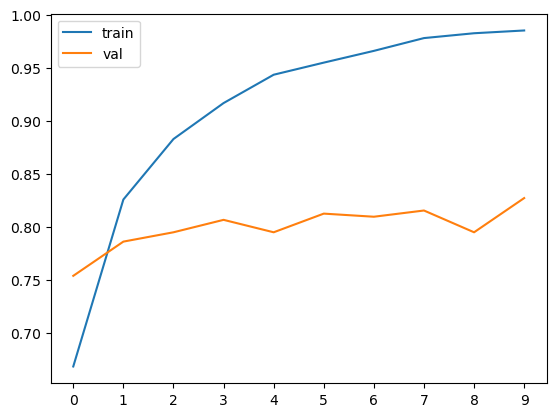

In [33]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [39]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
    )

    base_model.trainable = False

    ################################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ###############################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
scores = {}

learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    print(lr)
    model = make_model(learning_rate = lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr]=history.history
    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.2574 - loss: 2.1072 - val_accuracy: 0.5103 - val_loss: 1.5639
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.5484 - loss: 1.4469 - val_accuracy: 0.6276 - val_loss: 1.2323
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6246 - loss: 1.2064 - val_accuracy: 0.6598 - val_loss: 1.0632
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6941 - loss: 1.0052 - val_accuracy: 0.7214 - val_loss: 0.9559
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7111 - loss: 0.9016 - val_accuracy: 0.7273 - val_loss: 0.8849
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7323 - loss: 0.8580 - val_accuracy: 0.7419 - val_loss: 0.8336
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7499 - loss: 0.7859 - val_accuracy: 0.7595 - val_loss: 0.7946
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7683 - loss: 0.7264 - val_accuracy: 0

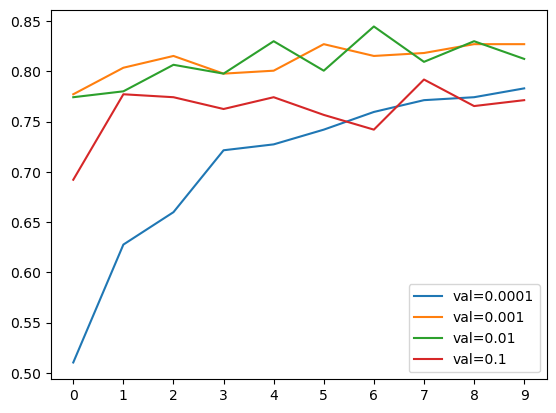

In [45]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [48]:
model.save_weights('model_v1.weights.h5')

In [51]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
                                save_best_only=True,
                                monitor='val_accuracy',
                                mode='max'
                                            )

In [52]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.5038 - loss: 1.4886 - val_accuracy: 0.7361 - val_loss: 0.7306
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7719 - loss: 0.6631 - val_accuracy: 0.7889 - val_loss: 0.6271
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8295 - loss: 0.4986 - val_accuracy: 0.8065 - val_loss: 0.5747
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8565 - loss: 0.4442 - val_accuracy: 0.8240 - val_loss: 0.5560
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8893 - loss: 0.3634 - val_accuracy: 0.7947 - val_loss: 0.5645
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8984 - loss: 0.3457 - val_accuracy: 0.8299 - val_loss: 0.5243
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9247 - loss: 0.2763 - val_accuracy: 0.8387 - val_loss: 0.5157
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9360 - loss: 0.2589 - val_accuracy: 0.8065 -